In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df_train = pd.read_csv("df_train_dicho.csv",index_col=0)

In [3]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,5,2,0,0,0,0,0,0,0,...,0,4,4,5,0,2,2008,0,0,208500
2,20,5,2,0,0,0,0,0,0,3,...,0,4,4,5,0,5,2007,0,0,181500
3,60,5,2,1,0,0,1,0,0,0,...,0,4,4,5,0,9,2008,0,0,223500
4,70,5,2,0,0,0,1,0,0,1,...,0,4,4,5,0,2,2006,0,1,140000
5,60,5,2,1,0,0,1,0,0,3,...,0,4,4,5,0,12,2008,0,0,250000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSSubClass     1460 non-null   int64
 1   MSZoning       1460 non-null   int64
 2   LotFrontage    1460 non-null   int64
 3   LotArea        1460 non-null   int64
 4   Street         1460 non-null   int64
 5   Alley          1460 non-null   int64
 6   LotShape       1460 non-null   int64
 7   LandContour    1460 non-null   int64
 8   Utilities      1460 non-null   int64
 9   LotConfig      1460 non-null   int64
 10  LandSlope      1460 non-null   int64
 11  Neighborhood   1460 non-null   int64
 12  Condition1     1460 non-null   int64
 13  Condition2     1460 non-null   int64
 14  BldgType       1460 non-null   int64
 15  HouseStyle     1460 non-null   int64
 16  OverallQual    1460 non-null   int64
 17  OverallCond    1460 non-null   int64
 18  YearBuilt      1460 non-null   int64
 19  YearRe

In [5]:
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV

In [6]:
scaler=StandardScaler()
X= pd.DataFrame(scaler.fit_transform(df_train),index=df_train.index,columns=df_train.columns)

In [7]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,0.073375,-0.120682,0.501674,-0.737254,-0.064238,-0.243025,-0.701291,-0.306146,-0.02618,-0.538603,...,-0.068692,0.063796,0.469867,0.191594,-0.087688,-1.599111,0.138777,-0.358449,-0.394786,0.347273
2,-0.872563,-0.120682,0.501674,-0.737254,-0.064238,-0.243025,-0.701291,-0.306146,-0.02618,3.341462,...,-0.068692,0.063796,0.469867,0.191594,-0.087688,-0.489110,-0.614439,-0.358449,-0.394786,0.007288
3,0.073375,-0.120682,0.501674,0.791710,-0.064238,-0.243025,1.016637,-0.306146,-0.02618,-0.538603,...,-0.068692,0.063796,0.469867,0.191594,-0.087688,0.990891,0.138777,-0.358449,-0.394786,0.536154
4,0.309859,-0.120682,0.501674,-0.737254,-0.064238,-0.243025,1.016637,-0.306146,-0.02618,0.754752,...,-0.068692,0.063796,0.469867,0.191594,-0.087688,-1.599111,-1.367655,-0.358449,0.283317,-0.515281
5,0.073375,-0.120682,0.501674,0.791710,-0.064238,-0.243025,1.016637,-0.306146,-0.02618,3.341462,...,-0.068692,0.063796,0.469867,0.191594,-0.087688,2.100892,0.138777,-0.358449,-0.394786,0.869843


In [9]:
X_c = X.drop(["SalePrice"],axis=1)
y=X["SalePrice"]

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X_c,y,test_size=0.2)

In [14]:
lr=LinearRegression()

In [16]:
lr.fit(X_train,y_train)

LinearRegression()

In [17]:
lr.score(X_train,y_train)

0.8539166704250553

In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,X_train,y_train).mean()
#score très mauvais

-4.191015895185803e+23

In [19]:
lr.score(X_test,y_test)

0.7304226296219009

In [20]:
pred_train = lr.predict(X_train)

In [21]:
from scipy.stats import probplot

In [22]:
res= pred_train - y_train
res_norm = (res - res.mean())/(res.std())

In [24]:
probplot(res_norm)

((array([-3.24209521, -2.98025416, -2.83435097, ...,  2.83435097,
          2.98025416,  3.24209521]),
  array([-7.635701  , -5.89596598, -5.83804073, ...,  3.72608071,
          7.19514747,  9.33820717])),
 (0.934950461698031, 2.2750762289557796e-16, 0.933082856747546))

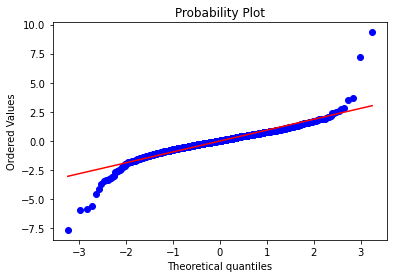

In [32]:

probplot(res_norm,plot=plt)

plt.show();

In [33]:
# bon je m'y attendais mais il y a beaucoup de problème de surapprentissage (énormément de variable sont corrélés entre elles)